<h1>Part 2 : EDA of Data Extracted from Job Postings</h1>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

import os

from wordcloud import WordCloud, STOPWORDS

In [2]:
# Load csv
with open('results.csv') as f:
    csv_data = pd.read_csv(f)
    raw_data = pd.DataFrame(csv_data)

raw_data.head()

,Job Title,Company,Location,Salary,Job Description
0,Pricing Analyst,Day & Ross Inc.,"Mississauga, ON",NaN,Position Title:Pricing Analyst\nPosition Type:...
1,Senior Data Analyst- Telephony Manager,NCRi Inc.,"Mississauga, ON",NaN,Title: Senior Data Analyst - Telephony Manager...
2,Fuel Cell Data Engineer / Analyst,Cummins Inc.,"Mississauga, ON",NaN,We are looking for a talented Fuel Cell Data E...
3,Senior Meter Data Analyst,Rodan Energy Solutions Inc.,"Mississauga, ON",NaN,CAREER OPPORTUNITY\nSENIOR METER DATA ANALYST\...
4,"Data Engineer, Business Intelligence & Analytics",Herjavec Group,"Toronto, ON",NaN,The Data Engineer reports directly to the Dire...


<h2>Explore Data</h2>

To begin, we will start by exploring the data analyst job postings.

We will need to summarize the information we collected in the previous step.

In [3]:
raw_data.describe()

,Job Title,Company,Location,Salary,Job Description
count,450,450,450,62,450
unique,314,267,16,47,384
top,Data Analyst,BMO Financial Group,"Toronto, ON","$60,000 - $70,000 a year",At the Janssen Pharmaceutical Companies of Joh...
freq,19,23,333,4,5


In [25]:
# Are there any NaNs in the data?
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        450 non-null    object
 1   Company          450 non-null    object
 2   Location         450 non-null    object
 3   Salary           62 non-null     object
 4   Job Description  450 non-null    object
 5   Position         450 non-null    object
 6   Position2        449 non-null    object
dtypes: object(7)
memory usage: 24.7+ KB


In [5]:
# Job Title
# Although "data analyst" was searched, job titles often vary. 
# Count the number of unique job titles
raw_data["Job Title"].nunique()

314

In [6]:
# Expecting more than a few different job titles to be present in this dataset
# Probably have to do a string search using regex to search if data and analyst is present in job title and ignore everything else
raw_data["Position"] = raw_data["Job Title"].apply(lambda x: x.lower())

In [7]:
raw_data.head()

,Job Title,Company,Location,Salary,Job Description,Position
0,Pricing Analyst,Day & Ross Inc.,"Mississauga, ON",NaN,Position Title:Pricing Analyst\nPosition Type:...,pricing analyst
1,Senior Data Analyst- Telephony Manager,NCRi Inc.,"Mississauga, ON",NaN,Title: Senior Data Analyst - Telephony Manager...,senior data analyst- telephony manager
2,Fuel Cell Data Engineer / Analyst,Cummins Inc.,"Mississauga, ON",NaN,We are looking for a talented Fuel Cell Data E...,fuel cell data engineer / analyst
3,Senior Meter Data Analyst,Rodan Energy Solutions Inc.,"Mississauga, ON",NaN,CAREER OPPORTUNITY\nSENIOR METER DATA ANALYST\...,senior meter data analyst
4,"Data Engineer, Business Intelligence & Analytics",Herjavec Group,"Toronto, ON",NaN,The Data Engineer reports directly to the Dire...,"data engineer, business intelligence & analytics"


<h3>Job Titles</h3>

In [9]:
# What kind of other various job titles that get are shown when you search "data analyst"??
# Let's try to group the job titles using some regex / string methods
# How similar are the different job titles?

raw_data.loc[raw_data["Position"].str.contains("analyst"), "Position2"] = "Analyst"
raw_data.loc[raw_data["Position"].str.contains("business"), "Position2"] = "Business Intelligence"
raw_data.loc[raw_data["Position"].str.contains("bi"), "Position2"] = "Business Intelligence"
raw_data.loc[raw_data["Position"].str.contains("scientist"), "Position2"] = "Data Scientist"
raw_data.loc[raw_data["Position"].str.contains("engineer"), "Position2"] = "Data Engineer"

raw_data.head()

,Job Title,Company,Location,Salary,Job Description,Position,Position2
0,Pricing Analyst,Day & Ross Inc.,"Mississauga, ON",NaN,Position Title:Pricing Analyst\nPosition Type:...,pricing analyst,Analyst
1,Senior Data Analyst- Telephony Manager,NCRi Inc.,"Mississauga, ON",NaN,Title: Senior Data Analyst - Telephony Manager...,senior data analyst- telephony manager,Analyst
2,Fuel Cell Data Engineer / Analyst,Cummins Inc.,"Mississauga, ON",NaN,We are looking for a talented Fuel Cell Data E...,fuel cell data engineer / analyst,Data Engineer
3,Senior Meter Data Analyst,Rodan Energy Solutions Inc.,"Mississauga, ON",NaN,CAREER OPPORTUNITY\nSENIOR METER DATA ANALYST\...,senior meter data analyst,Analyst
4,"Data Engineer, Business Intelligence & Analytics",Herjavec Group,"Toronto, ON",NaN,The Data Engineer reports directly to the Dire...,"data engineer, business intelligence & analytics",Data Engineer


In [10]:
raw_data.describe()

,Job Title,Company,Location,Salary,Job Description,Position,Position2
count,450,450,450,62,450,450,449
unique,314,267,16,47,384,312,4
top,Data Analyst,BMO Financial Group,"Toronto, ON","$60,000 - $70,000 a year",At the Janssen Pharmaceutical Companies of Joh...,data analyst,Analyst
freq,19,23,333,4,5,19,243


In [11]:
jobtitle = raw_data.groupby(["Position2"]).count().sort_values(by=["Position2"], ascending=False)

jobtitle.head(6)

,Job Title,Company,Location,Salary,Job Description,Position
Position2,,,,,,
Data Scientist,1,1,1,0,1,1
Data Engineer,5,5,5,0,5,5
Business Intelligence,200,200,200,24,200,200
Analyst,243,243,243,37,243,243


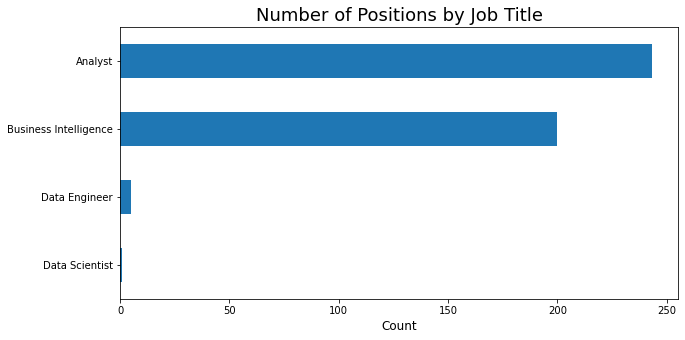

In [12]:
jobtitle['Position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 18)
plt.show()

In [13]:
#raw_data.loc[raw_data["Position"].str.contains(r'^(?=a*intern)(?=.*student)'), "Position3"] = "Intern"
#raw_data.loc[raw_data["Position"].str.contains("junior"), "Position3"] = "Junior"
#raw_data.loc[raw_data["Position"].str.contains("senior"), "Position3"] = "Senior"
#raw_data.loc[raw_data["Position"].str.contains("manager"), "Position3"] = "Manager"
#raw_data.loc[raw_data["Position"].str.contains("director"), "Position3"] = "Director"
#raw_data.loc["Position3"]=raw_data.Position3.apply[lambda x: "Mid" if x = np.nan else x for x in raw_data.at[x, "Position3"]]

raw_data.head()

,Job Title,Company,Location,Salary,Job Description,Position,Position2
0,Pricing Analyst,Day & Ross Inc.,"Mississauga, ON",NaN,Position Title:Pricing Analyst\nPosition Type:...,pricing analyst,Analyst
1,Senior Data Analyst- Telephony Manager,NCRi Inc.,"Mississauga, ON",NaN,Title: Senior Data Analyst - Telephony Manager...,senior data analyst- telephony manager,Analyst
2,Fuel Cell Data Engineer / Analyst,Cummins Inc.,"Mississauga, ON",NaN,We are looking for a talented Fuel Cell Data E...,fuel cell data engineer / analyst,Data Engineer
3,Senior Meter Data Analyst,Rodan Energy Solutions Inc.,"Mississauga, ON",NaN,CAREER OPPORTUNITY\nSENIOR METER DATA ANALYST\...,senior meter data analyst,Analyst
4,"Data Engineer, Business Intelligence & Analytics",Herjavec Group,"Toronto, ON",NaN,The Data Engineer reports directly to the Dire...,"data engineer, business intelligence & analytics",Data Engineer


In [14]:
# Location
# The location was already specifically searched for
# The actual job posting doesn't have any address details, so a map would be difficult without actually looking up the details of each location. However an actual map would be fun.

In [15]:
# Company
# Is there a company that is looking to hire the most data candidates?
raw_data["Company"].describe()

count                     450
unique                    267
top       BMO Financial Group
freq                       23
Name: Company, dtype: object

In [16]:
company = raw_data.groupby(["Company"]).count().sort_values('Position', ascending=False).head(20)
company.head(10)

,Job Title,Location,Salary,Job Description,Position,Position2
Company,,,,,,
BMO Financial Group,23,23,0,23,23,23
Procom,15,15,0,15,15,15
Johnson & Johnson Family of Companies,9,9,0,9,9,9
CIBC,9,9,0,9,9,9
Scotiabank,9,9,0,9,9,9
TD Bank,8,8,0,8,8,8
Sun Life Financial,8,8,0,8,8,8
Rogers Communications,6,6,0,6,6,6
RBC,5,5,0,5,5,5


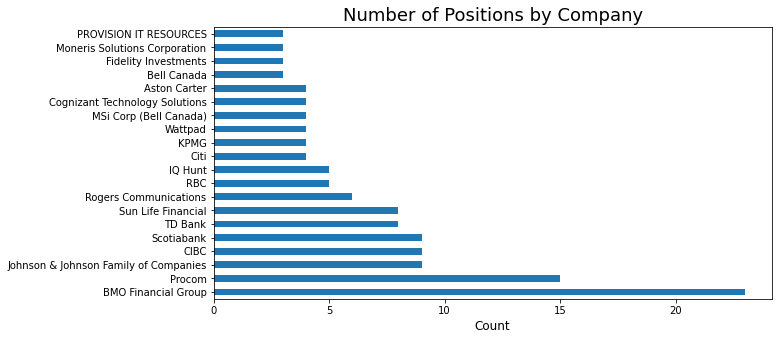

In [17]:
company['Position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Company', size = 18)
plt.show()

In [18]:
# Salary
# Count the number of salaries available with .describe()
# Create a histogram with the number of jobs per salary
# Maybe a scatterplot would be better to determine whether job
raw_data["Salary"].describe()

count                           62
unique                          47
top       $60,000 - $70,000 a year
freq                             4
Name: Salary, dtype: object

In [19]:
salary_df = raw_data[["Salary"]].dropna()
salary_df.head()

,Salary
23,$40 an hour
38,"$60,000 - $70,000 a year"
49,$23 - $25 an hour
58,$41.03 - $47.58 an hour
65,"$70,000 a year"


In [20]:
# Is the salary provided by hour or per year?
salary_df.loc[salary_df["Salary"].str.contains("hour"), "Salarybytime"] = "hour"
salary_df.loc[salary_df["Salary"].str.contains("year"), "Salarybytime"] = "year"

salary_df.head()

,Salary,Salarybytime
23,$40 an hour,hour
38,"$60,000 - $70,000 a year",year
49,$23 - $25 an hour,hour
58,$41.03 - $47.58 an hour,hour
65,"$70,000 a year",year


In [21]:
# There aren't very many salaries available here
# First, convert all the salaries to the same scale (thousands per year)
# wage / hour * (40 hour / week) * (52 weeks) = wage/year

def find_number(text):
    num = re.findall(r'\d+',text)
    return " ".join(num[0:1])

salary_df['yearSalary'] = salary_df['Salary'].apply(lambda x: find_number(x))
    
salary_df.head()

,Salary,Salarybytime,yearSalary
23,$40 an hour,hour,40
38,"$60,000 - $70,000 a year",year,60
49,$23 - $25 an hour,hour,23
58,$41.03 - $47.58 an hour,hour,41
65,"$70,000 a year",year,70


In [22]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 23 to 447
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Salary        62 non-null     object
 1   Salarybytime  62 non-null     object
 2   yearSalary    62 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [23]:
salary_df["yearSalary"] = salary_df["yearSalary"].astype("int64")

In [ ]:
hour.reset_index(inplace=True)
hour.head()

In [ ]:
# this doesn't do what I want it to
#salary_df["Salarybytime"] = salary_df["Yearly ($10K)"].apply(lambda x: int(x)*40*52 if x == "hour" else x)
#salary_df.head()

In [ ]:
# lets test using just the postings that list salary by hour
hour = salary_df.loc[salary_df["Salarybytime"].str.contains("hour")]
hour.head()

In [ ]:
print(hour.index())

In [ ]:
def hour_to_year(x):
    num = int(x)*40*52
    return num

hour["yearSalary2"] = hour.loc[hour["yearSalary"]].apply(lambda x: hour_to_year(x))

hour.head()

In [ ]:
# group raw_data by 'Salarybytime'
# append yearly salary values to calculated hourly df then append that to grouped raw_data df